In [8]:
# Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [6]:
# Create DataFrame
df = pd.read_csv("E:\\GitHub\\dataset\\airmiles.csv", index_col = "Date", parse_dates = True, dayfirst = True)

In [ ]:
# Change Frequency to Month Start
df = df.asfreq("MS")

In [14]:
# Rename Column Names
df.rename(columns={'airmiles' : 'y'}, inplace = True)

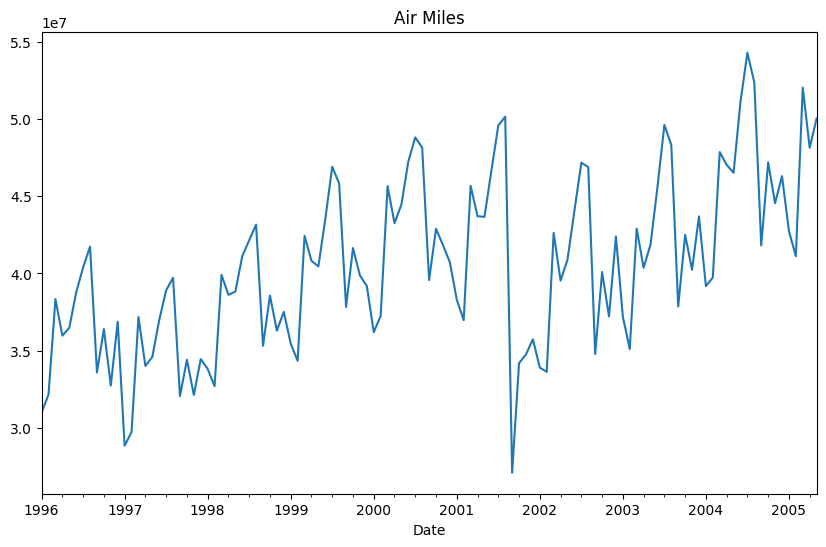

In [16]:
# Plotting Airmiles Data
df['y'].plot(figsize=(10,6), title="Air Miles")
plt.show()

#### Time Period: 1996 to 2005.

#### Trend: Overall upward trend in air miles traveled over the years.

#### Seasonality: Recurring peaks and dips suggest seasonal patterns.

#### Anomaly: Sharp drop around 2001–2002, likely due to an external event.

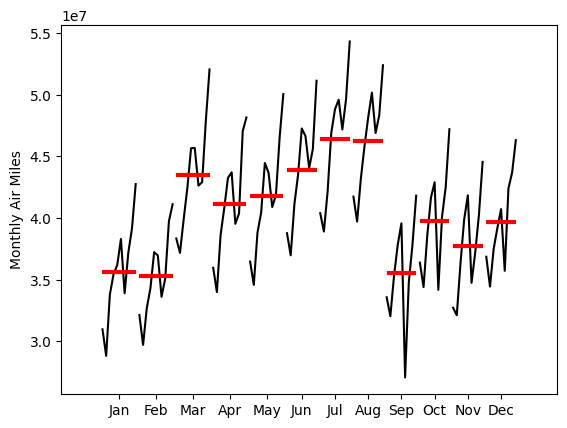

In [17]:
# Monthly Plot
month_plot(df['y'], ylabel="Monthly Air Miles")
plt.show()

#### Highest travel months: July and August.

#### Lowest travel months: January and February.

#### Clear seasonal pattern: Peaks in summer, dips in winter.

#### September drop: Notable consistent dip, possibly travel slowdown after summer.

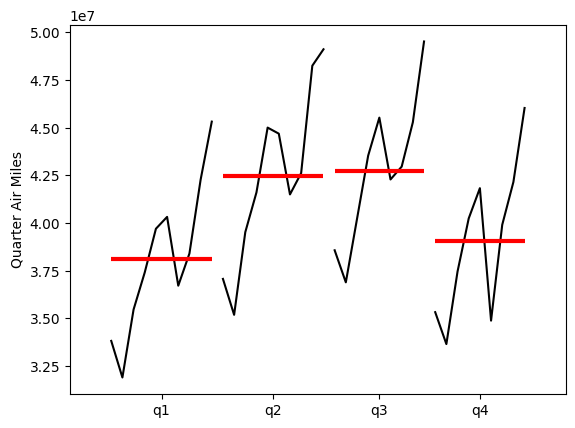

In [19]:
# Quarter Plot
quarter_plot(df['y'].resample('QE').mean(), ylabel="Quarter Air Miles")
plt.show()

#### Q3 (Jul–Sep): Highest air travel activity on average.

#### Q1 (Jan–Mar): Lowest travel volume overall.

#### Q2 and Q3: Show consistently strong performance.

#### Q4 (Oct–Dec): Moderate activity with some year-to-year fluctuation.

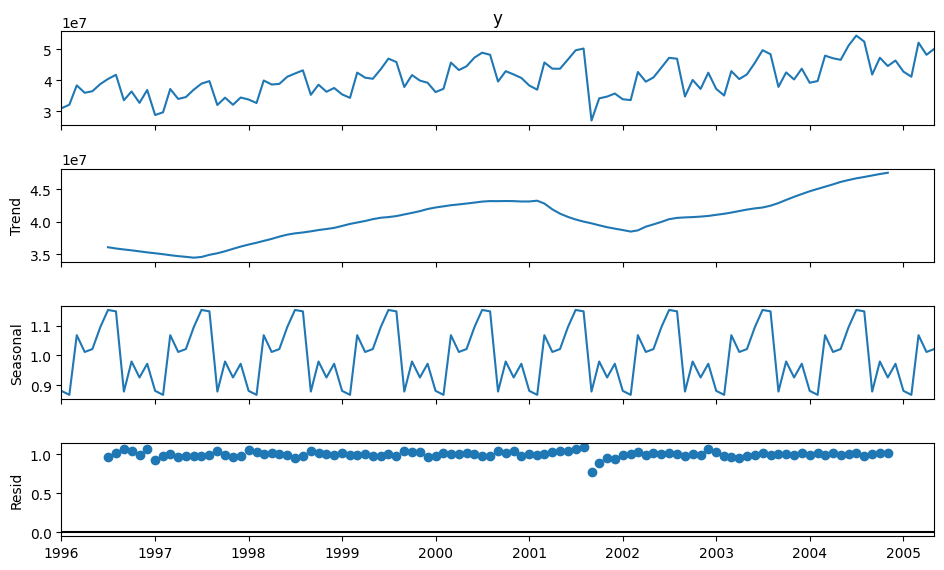

In [29]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period=12)
fig = decomposition.plot()
fig.set_size_inches(10,6)
plt.show()

#### Observed (Airmiles): Original time series data from 1996 to 2005.

#### Trend: Overall upward movement with a dip around 2001–2002.

#### Seasonal: Clear yearly repeating pattern (seasonality).

#### Residual: Irregularities/noise, with noticeable anomaly around 2001–2002.

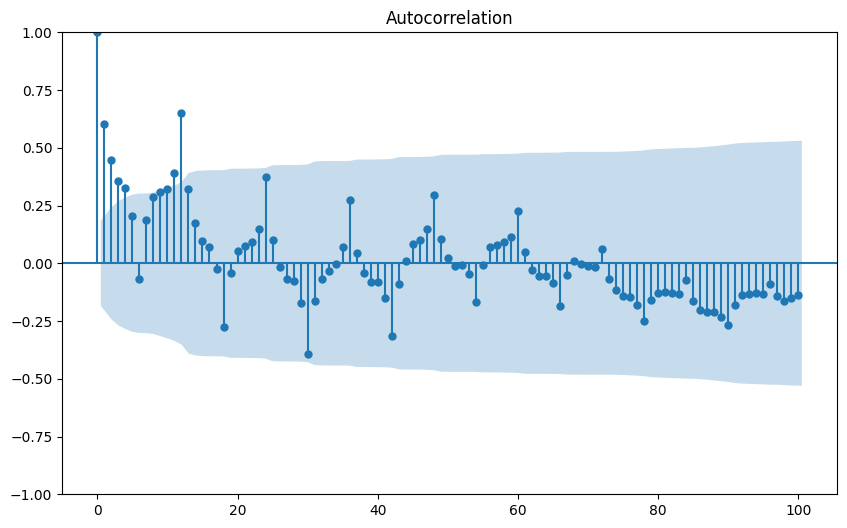

In [30]:
# Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

#### Strong autocorrelation at lag 1, gradually decreasing with higher lags.

#### Significant spikes at regular intervals, suggesting possible seasonality or periodic patterns.

#### Confidence interval (shaded area): Spikes outside this band are statistically significant.

#### Positive autocorrelation dominates early lags, indicating persistent patterns.

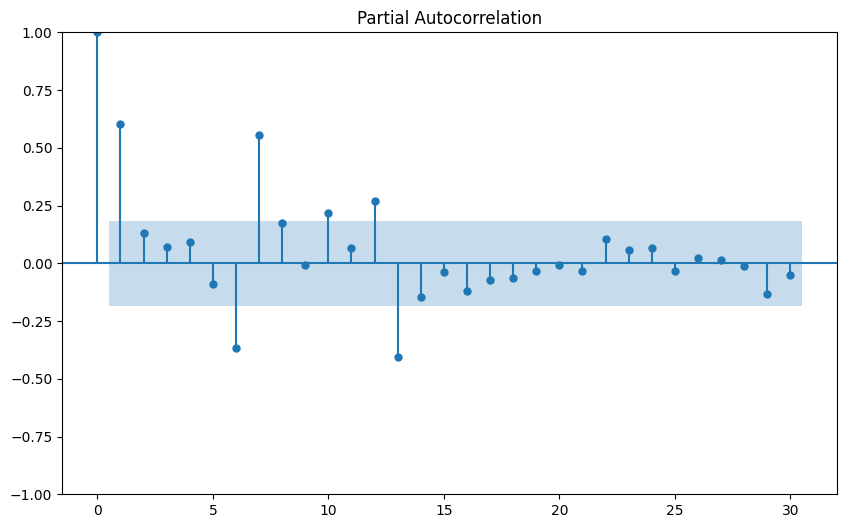

In [31]:
# Partial Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['y'], lags = 30, ax=ax)
plt.show()

#### Significant spikes at lags 1, 2, and 8, indicating direct correlation with the original series at those lags.

#### Most values beyond lag 10 stay within the confidence interval, suggesting minimal direct influence.

#### Useful for identifying the order (p) in AR (AutoRegressive) models.

In [32]:
# Training and Test Data Split
train, test = df.iloc[:-12, :], df.iloc[-12:, :]

In [34]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Holt-Winters Model
model = ExponentialSmoothing(train,
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods=12).fit()
predictions = model.forecast(steps = len(test)).rename('Holt-Winters')
predictions

2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [ ]:
# Model Assessment Function
def model_assessment(train, test, predictions, chart_title):
    plt.figure(figsize = (12,6))
    plt.plot(train, label= 'Train')
    plt.plot(test, label = 'Test')
    plt.plot(predictions, label = 'Forecast')
    plt.title(f"Train, Test and Predictions with {chart_title}")
    plt.legend()
    plt.show()

    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = mean_absolute_percentage_error(test, predictions)

    print(f"The MAE is {mae:.2f}")
    print(f"The RMSE is {rmse:.2f}")
    print(f"The MAPE is {mape*100:.2f}%")

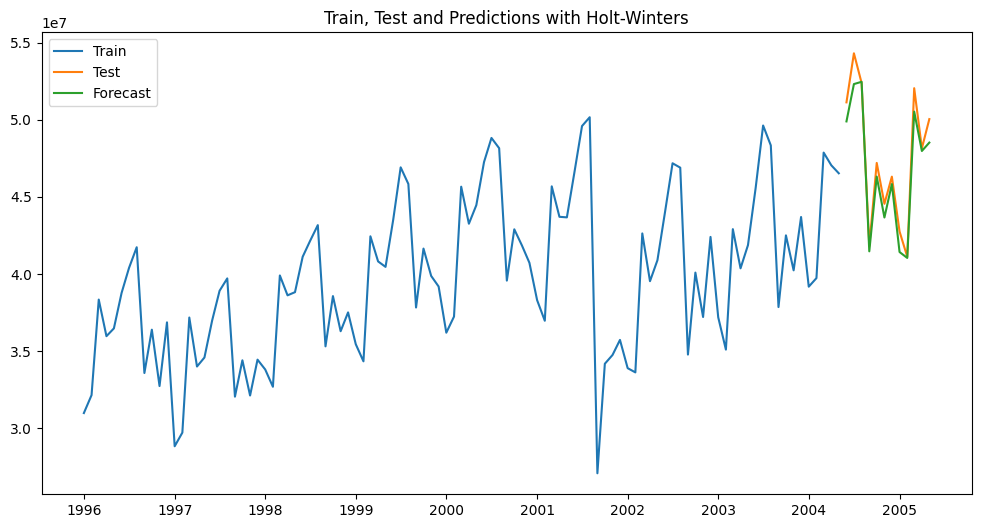

The MAE is 877575.16
The RMSE is 1075653.07
The MAPE is 1.80%


In [36]:
# Model Assessment
model_assessment(train, test, predictions, "Holt-Winters")

### Plot and Evaluation metrics:

#### Blue line (Train): Historical training data from 1996 to early 2004.

#### Orange line (Test): Actual test data (mid-2004 to 2005).

#### Green line (Forecast): Holt-Winters predictions for the test period.

#### Visual fit: The forecast closely follows the test trend, capturing seasonality and trend effectively.

### Performance Metrics:

#### MAE (Mean Absolute Error): 877,575.16 – average absolute difference between actual and predicted values.

#### RMSE (Root Mean Squared Error): 1,075,653.07 – penalizes larger errors more heavily.

#### MAPE (Mean Absolute Percentage Error): 1.80% – very low error, indicating high forecast accuracy.

# Predicting the Future

In [43]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Holt-Winters Model
model = ExponentialSmoothing(df['y'],
                             trend = 'mul',
                             seasonal= 'mul',
                             seasonal_periods=12).fit()

forecast = model.forecast(steps = 12).rename('Holt-Winters')
forecast

2005-06-01    5.317705e+07
2005-07-01    5.585684e+07
2005-08-01    5.559980e+07
2005-09-01    4.374628e+07
2005-10-01    4.922822e+07
2005-11-01    4.655935e+07
2005-12-01    4.885796e+07
2006-01-01    4.429477e+07
2006-02-01    4.367190e+07
2006-03-01    5.397746e+07
2006-04-01    5.112520e+07
2006-05-01    5.178827e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [42]:
# Model Assessment
def plot_future(y, predictions, chart_title):
    plt.figure(figsize = (12,6))
    plt.plot(y, label= 'Train')
    plt.plot(predictions, label = 'Forecast')
    plt.title(f"Train and Predictions with {chart_title}")
    plt.legend()
    plt.show()

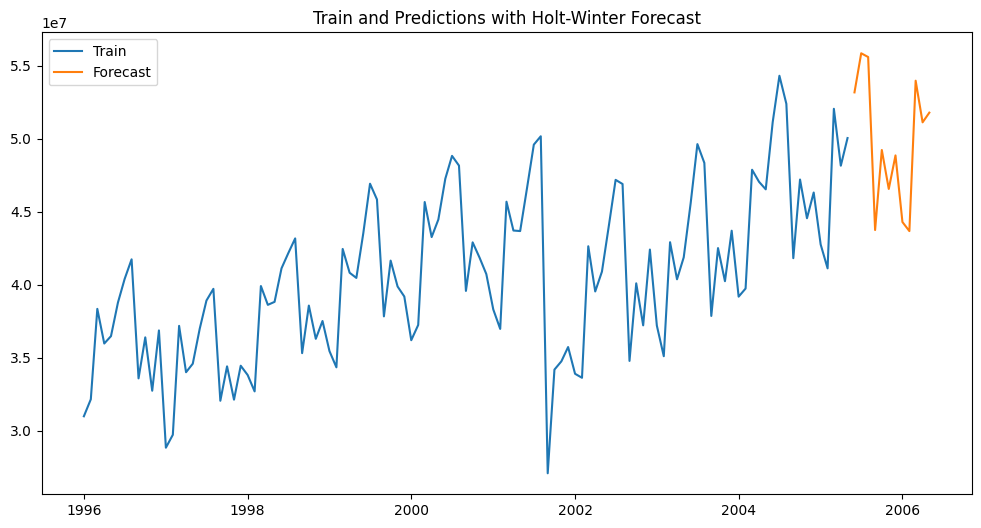

In [41]:
# Plotting Future
plot_future(df['y'], forecast, 'Holt-Winter Forecast')